How to save .h5 and .json files?

# serialize model to JSON
model_json = model.to_json()
with open("model_BellPepper_25.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_BellPepper_25.h5")
print("Saved model to disk")


from google.colab import files
files.download('model_BellPepper_25.h5')
files.download('model_BellPepper_25.json')

What is Transfer Learning? 
https://towardsdatascience.com/transfer-learning-with-convolutional-neural-networks-in-pytorch-dd09190245ce#:~:text=The%20basic%20premise%20of%20transfer,layers%20which%20make%20a%20prediction.

How to save CNN keras model to file, how to open it and test on dataset. 

Load the CNN .h5 model to your google colab

In [20]:
# from google.colab import files
# uploaded = files.upload()

Saving model_BellPepper_25.json to model_BellPepper_25.json


In [5]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import HTML

#for the confusion matrix
import sklearn.metrics as sk_metrics
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [9]:
!git clone https://github.com/TinaNgo2021/AgriApp2022.git

Cloning into 'AgriApp2022'...
remote: Enumerating objects: 19601, done.
remote: Counting objects: 100% (3311/3311), done.
remote: Compressing objects: 100% (1728/1728), done.
remote: Total 19601 (delta 843), reused 3311 (delta 843), pack-reused 16290
Receiving objects: 100% (19601/19601), 873.82 MiB | 41.19 MiB/s, done.
Resolving deltas: 100% (851/851), done.
Checking out files: 100% (11862/11862), done.


In [7]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=25
n_classes = 2

In [10]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "AgriApp2022/BellPepper",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2475 files belonging to 2 classes.


Read the dataset using tensorflow

In [11]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

Split the dataset into training, validation, and testing set

In [12]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

Resize and rescale the images

In [13]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

Apply data augmentation to increase the number of training images

In [14]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [ ]:
#apply data augmentation techniqies on the traning dataset

In [15]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
)

load the model and test it 

In [23]:
# load json and create model
from tensorflow.keras.models import Sequential, model_from_json
json_file = open('model_BellPepper_25.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model_BellPepper_25.h5")
print("Loaded model from disk")

Loaded model from disk
Loaded model from disk


Evaluate the model on the testing set 

In [28]:
# evaluate loaded model on test data

loaded_model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)
#score = loaded_model.evaluate(X, Y, verbose=0)
scores = loaded_model.evaluate(test_ds)
#print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

9/9 [==============================] - 11s 716ms/step - loss: 0.0215 - accuracy: 0.9931


In [30]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

In [33]:
class_names = dataset.class_names

Print out some testing images

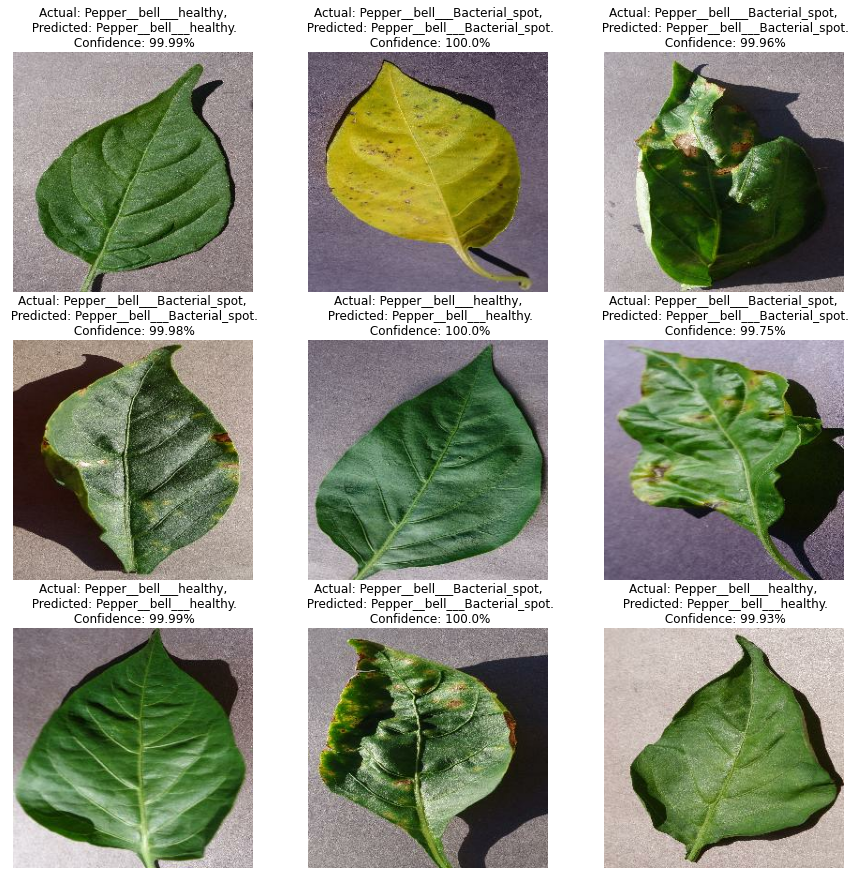

In [34]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(loaded_model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")